# Data Preparation

In [1]:
# import pandas for data analysis
import pandas as pd

In [2]:
# read in csv file

df = pd.read_csv('source/churn_clean.csv')
df = df[['Income', 'Children']]
df.head()

,Income,Children
0,28561.99,0
1,21704.77,1
2,9609.57,4
3,18925.23,1
4,40074.19,0


## Data Descriptions: Numeric Variables

In [3]:
df.describe()

,Income,Children
count,10000.000000,10000.0000
mean,39806.926771,2.0877
std,28199.916702,2.1472
min,348.670000,0.0000
25%,19224.717500,0.0000
50%,33170.605000,1.0000
75%,53246.170000,3.0000
max,258900.700000,10.0000


## Data Normalization

In [4]:
# import StandardScaler to normalize Income and Children
from sklearn.preprocessing import StandardScaler

In [5]:
# normalize data
StandardScaler().fit_transform(df)

array([[-0.39877774, -0.97233791],
       [-0.64195445, -0.50659192],
       [-1.07088496,  0.89064606],
       ...,
       [ 0.21903654, -0.50659192],
       [-0.82058767, -0.50659192],
       [-1.09176018, -0.50659192]])

In [6]:
# write normalized data to DataFrame
# export DataFrame as CSV file
df_normalized = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['Income','Children'])
pd.DataFrame.to_csv(df_normalized, 'output/churn_processed.csv')

# Analysis

## Dendrogram

In [8]:
# import dendrogram from scipy.cluster.hierarchy
# import plt to plot dendrogram
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

# import AgglomerativeClustering to perform Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

In [9]:
dgm = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(df_normalized)

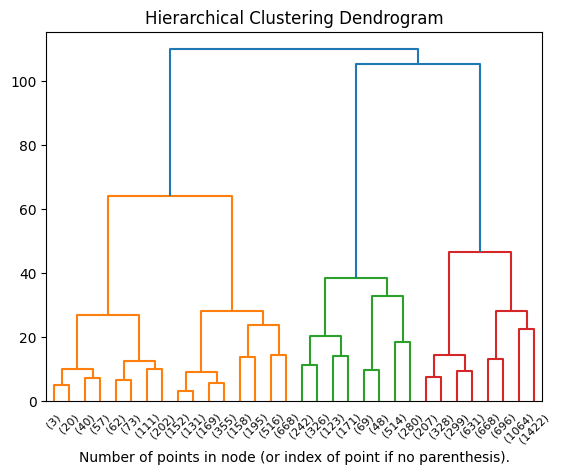

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top n levels of the dendrogram
plot_dendrogram(dgm, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Scatterplot

In [25]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_normalized)

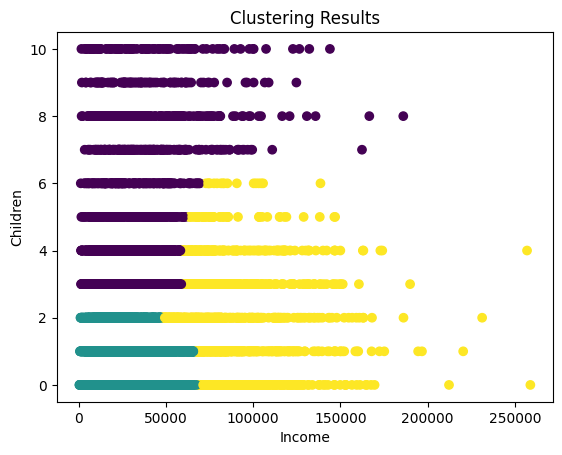

In [43]:
# plot Income and Children, color with cluster labels
plt.scatter(df.Income, df.Children, c = clustering.labels_)
plt.title('Clustering Results')
plt.xlabel('Income')
plt.ylabel('Children')
plt.show()

## Accuracy

In [44]:
# import silhouette_score to evaluate model
from sklearn.metrics import silhouette_score

In [45]:
# calculate silhouette score
silhouette_score(df_normalized, clustering.labels_)

0.410433591411882

In [46]:
# create function to plot silhouette scores

scores = []

def get_scores():
    for i in range(2, 10):
        clustering = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(df_normalized)
        scores.append(silhouette_score(df_normalized, clustering.labels_))        
    return scores

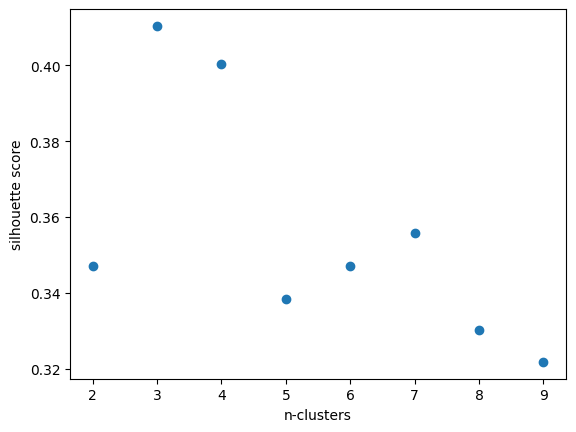

In [47]:
# plot various silhouette scores
plt.scatter(range(2, 10), get_scores())
plt.xlabel('n-clusters')
plt.ylabel('silhouette score')
plt.show()